In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus = data.lower().split('\n')

In [3]:
len(corpus) # 64개의 문장

64

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # 항상 이렇게 해줘야함, oov 떄문

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [5]:
# 잘 모를 떄 하는 방법
input_sequences = []
for line in corpus:
    tokenlist = tokenizer.texts_to_sequences([line])[0]
    print(tokenlist)
    break

[4, 2, 66, 8, 67, 68, 69, 70]


In [6]:
# to make corpus
input_sequences = []
for line in corpus:
    tokenlist = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokenlist)):
        n_gram_sequence = tokenlist[:i+1] # 0~1, 0~2, 0~3 이런식으로
        print(n_gram_sequence)
    break

# 이런 리스트가 64개가 생길거야!

[4, 2]
[4, 2, 66]
[4, 2, 66, 8]
[4, 2, 66, 8, 67]
[4, 2, 66, 8, 67, 68]
[4, 2, 66, 8, 67, 68, 69]
[4, 2, 66, 8, 67, 68, 69, 70]


In [7]:
# to make corpus, and padd
input_sequences = []
for line in corpus:
    tokenlist = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokenlist)):
        n_gram_sequence = tokenlist[:i+1] # 0~1, 0~2, 0~3 이런식으로
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x)for x in input_sequences])
print(max_sequence_len) # 11개가 제일 많은 문장이므로, 이제 패딩을 넣어주려고 한다

input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len )) # 나머지는 pre로
input_sequences[0]

11


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2], dtype=int32)

In [8]:
# 이제 라벨을 만들거야
xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

In [9]:
labels[0] # 그냥 맨 끝만 라벨로 삼을거야, 아 그래서 그 전까지만 들어온거 -> 마지막걸 예측할거야

2

In [10]:
xs[0], labels[0]  # 마지막걸 예측할거야

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4], dtype=int32), 2)

In [11]:
total_words

263

In [12]:
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words) # 원핫인코딩해주는 keras

In [13]:
ys[0] # 음! 2에만 1이 되고 나머지는 다 0, 라벨을 원핫 인코딩을 했다고 생각하면 됩니다

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length= max_sequence_len - 1)) # 맨 마지막껄 예측하려고 뻈으니까
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation = 'softmax')) # 전체 label들 중에 하나를 골라야 하니까!
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(xs, ys, epochs = 500, verbose = 1 )

Epoch 1/500
15/15 [==============================] - 0s 6ms/step - loss: 5.5676 - accuracy: 0.0287
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 5.5394 - accuracy: 0.0486
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 5.4625 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 5.2624 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 5.1137 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0624 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 5.0313 - accuracy: 0.0508
Epoch 8/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9980 - accuracy: 0.0574
Epoch 9/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9620 - accuracy: 0.0662
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9175 - accuracy: 0.0640
Epoch 11/

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            16832     
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 263)               10783     
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.figure(figsize=(10,5))
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

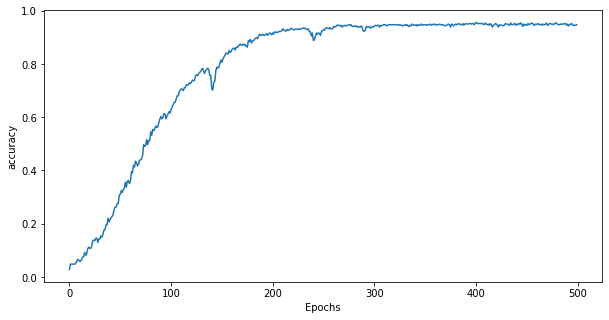

In [21]:
plot_graphs(history, 'accuracy')

In [23]:
seed_text = "Laurence went to dublin"

next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len -1)
    predicted = model.predict_classes(token_list)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text) # 학습한 vocab 내에서 다음 문장을 계속해서 예측했다..

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Laurence went to dublin to be ladies ladies ladies hall girls nelly hullabaloo glisten glisten glisten accident eyes accident glisten glisten glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident

In [26]:
seed_text = "Laurence went to dublin"

next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len -1)
    predicted = model.predict_classes(token_list)
    print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text) # 학습한 vocab 내에서 다음 문장을 계속해서 예측했다..

[13]
[100]
[124]
[124]
[124]
[141]
[17]
[143]
[250]
[97]
[97]
[97]
[180]
[96]
[180]
[97]
[97]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
[153]
[97]
[97]
[180]
[96]
[180]
[97]
Laurence went to dublin to be ladies ladies ladies hall girls nelly hullabaloo glisten glisten glisten accident eyes accident glisten glisten glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glisten polkas glisten glisten accident eyes accident glist

In [24]:
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen = max_sequence_len -1)
predicted = model.predict_classes(token_list)

In [25]:
predicted

array([153])